In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

Para importar la tabla en un formato correcto

In [33]:
pd.set_option('display.float_format','{:2f}'.format)

Importamos las tablas

In [34]:
train_data = pd.read_csv('/henry/Datathon-main/properties_colombia_train.csv')
test_data = pd.read_csv('/henry/Datathon-main/properties_colombia_test.csv')

In [35]:
train_data.head(2)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9000000000.000000,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,625000000.000000,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)


In [36]:
df=train_data[['end_date','price']]

In [37]:
df.head()

,end_date,price
0,9999-12-31,9000000000.000000
1,2021-05-14,625000000.000000
2,2020-08-20,420000000.000000
3,2020-11-30,1310000000.000000
4,2020-10-07,210000000.000000


Dropeamos la primera fila que tiene un dato erroneo de fecha

In [43]:
df.drop([0],inplace=True)

C:\Users\juseb\AppData\Local\Temp\ipykernel_1452\3217149633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([0],inplace=True)


Dropeamos la otra fila que tambien tiene un dato erroneo

In [54]:
df['end_date']=df['end_date'].replace('9999-12-31','2020-1-1')

C:\Users\juseb\AppData\Local\Temp\ipykernel_1452\1678616414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['end_date']=df['end_date'].replace('9999-12-31','2020-1-1')


In [55]:
df['end_date'].unique

<bound method Series.unique of 1         2021-05-14
2         2020-08-20
3         2020-11-30
4         2020-10-07
5         2021-03-04
             ...    
197544      2020-1-1
197545    2020-12-09
197546    2021-01-02
197547    2020-08-14
197548    2020-11-27
Name: end_date, Length: 197548, dtype: object>

Convertimos a formato datatime

In [57]:
df['end_date']=pd.to_datetime(df.end_date)

C:\Users\juseb\AppData\Local\Temp\ipykernel_1452\3321517102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['end_date']=pd.to_datetime(df.end_date)


Cambiamos el nombre de la columna end_date por fecha

In [58]:
df['fecha']=df['end_date']

C:\Users\juseb\AppData\Local\Temp\ipykernel_1452\754897771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha']=df['end_date']


In [60]:
df.drop(columns='end_date')

,price,fecha
1,625000000.000000,2021-05-14
2,420000000.000000,2020-08-20
3,1310000000.000000,2020-11-30
4,210000000.000000,2020-10-07
5,167952300.000000,2021-03-04
...,...,...
197544,129000000.000000,2020-01-01
197545,135000000.000000,2020-12-09
197546,520000000.000000,2021-01-02
197547,290000000.000000,2020-08-14


Mostramos todos los precios 

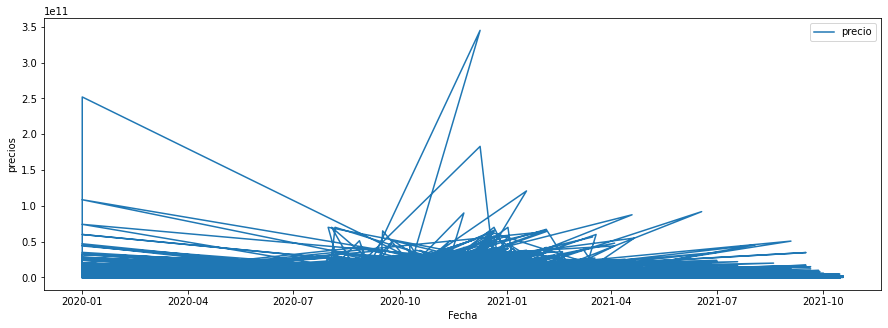

In [88]:
plt.figure(figsize = (15,5))

plt.plot(df.fecha, df.price, label = 'precio')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('precios')
#plt.ylim(-100,500)
plt.show()

# Agrupacion semanal

In [89]:
semanal = df.resample('W', on = 'fecha').mean()
semanal.head()

,price
fecha,
2020-01-05,841568033.552436
2020-01-12,NaN
2020-01-19,NaN
2020-01-26,NaN
2020-02-02,NaN


Mostramos los precios agrupados por semanas

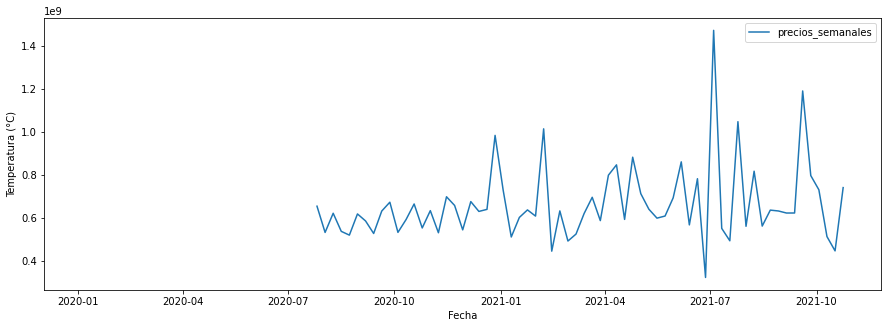

In [91]:
plt.figure(figsize = (15,5))

plt.plot(semanal.index, semanal.price, label = 'precios_semanales')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
#plt.ylim(-10,40)
plt.legend()
plt.show()

In [96]:
semanal['fecha_numeros']=semanal.index.map(datetime.datetime.toordinal)
semanal.head()

,price,fecha_numeros
fecha,,
2020-01-05,841568033.552436,737429
2020-01-12,NaN,737436
2020-01-19,NaN,737443
2020-01-26,NaN,737450
2020-02-02,NaN,737457


In [100]:
promedio_precio=df.price.mean()

In [119]:
df.price.fillna(promedio_precio,inplace=True)

C:\Users\juseb\AppData\Local\Temp\ipykernel_1452\4071380398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.price.fillna(promedio_precio,inplace=True)


# A partir de ahora todo lo que esta debajo es para entrenar el modelo y realizar las predicciones

In [120]:
ventana = (105)
semanal_promedio_tendencia = semanal.price.rolling(window=ventana, center = True).mean()
semanal_promedio_tendencia.head(200)

fecha
2020-01-05   NaN
2020-01-12   NaN
2020-01-19   NaN
2020-01-26   NaN
2020-02-02   NaN
              ..
2021-09-26   NaN
2021-10-03   NaN
2021-10-10   NaN
2021-10-17   NaN
2021-10-24   NaN
Freq: W-SUN, Name: price, Length: 95, dtype: float64

In [125]:
# Imputamos faltantes con la función interpolate
semanal = semanal.interpolate()

In [121]:
semanal['fecha_numeros']=semanal.index.map(datetime.datetime.toordinal)

In [126]:
from sklearn.linear_model import LinearRegression

reg_lineal = LinearRegression() #Instanciamos el modelo

reg_lineal.fit(semanal.fecha_numeros.values.reshape(-1, 1), semanal.price) # Lo entrenamos

LinearRegression()

Mostramos el promedio de precio agrupado por semana con una regresion lineal

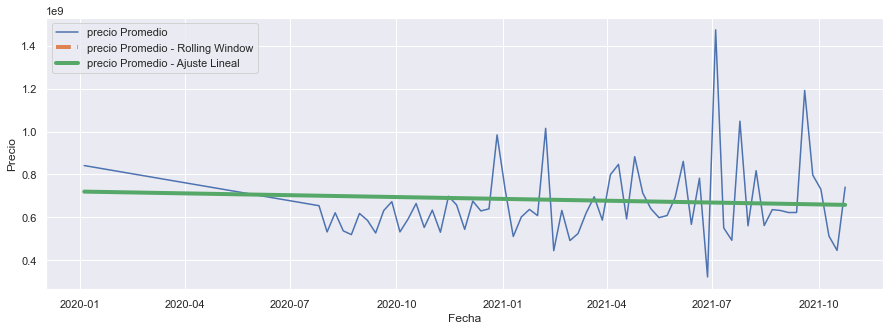

In [129]:
plt.figure(figsize = (15,5)) 

plt.plot(semanal.index, semanal.price, label = 'precio Promedio')
plt.plot(semanal_promedio_tendencia, ls = '--', lw = 4, label = 'precio Promedio - Rolling Window')
plt.plot(semanal.index, reg_lineal.predict(semanal.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Precio Promedio - Ajuste Lineal')

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Empezamos a crear el modelo ARIMA para las predicciones

In [133]:
from statsmodels.tsa.arima.model import ARIMA

In [146]:
# Para datos no estacionales

# En parámetro order debemos especificar p, d y q

model = ARIMA(semanal['price'],order=(1,1,1)) # \Delta y_t = \psi_1y_{t-1} + \delta_1e_{t-1} + e_t

model_fit=model.fit()

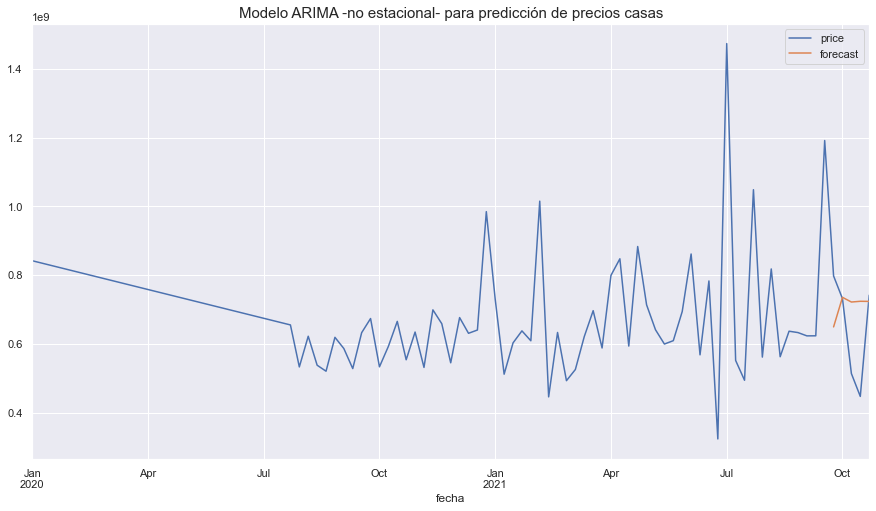

In [147]:
semanal['forecast']=model_fit.predict(start = 90, end = 103, dynamic = True)
semanal[['price','forecast']].plot(figsize=(15,8))
plt.title('Modelo ARIMA -no estacional- para predicción de precios casas', fontsize = 15)
plt.show()

In [139]:
import statsmodels as sm

In [148]:
# En el parámetro seasonal_orden debemos indicar = p estacional, d estacional, q estacional y periodicidad estacional

model=sm.tsa.statespace.sarimax.SARIMAX(semanal['price'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

c:\Users\juseb\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


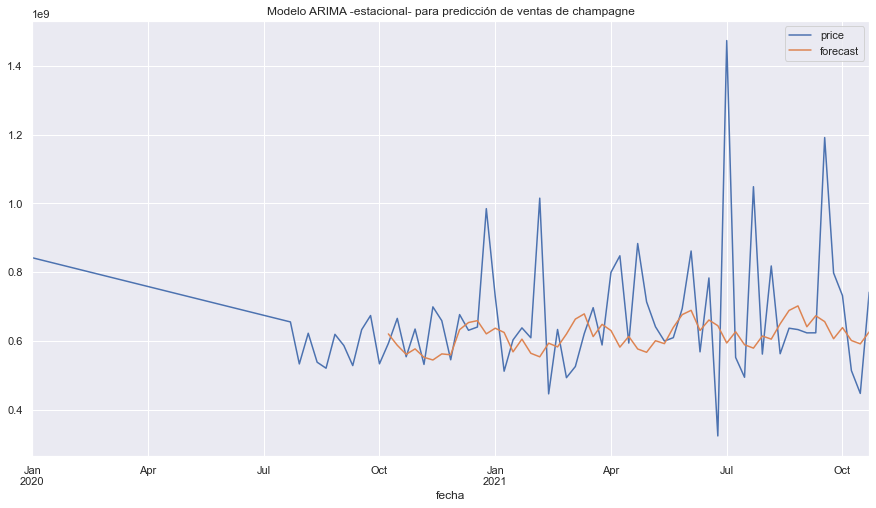

In [287]:
semanal['forecast']=results.predict(start=40,end=103,dynamic=True)
semanal[['price','forecast']].plot(figsize=(15,8))
plt.title('Modelo ARIMA -estacional- para predicción de ventas de champagne')
plt.show()

In [353]:
from pandas.tseries.offsets import DateOffset
future_dates = [semanal.index[-1]+ DateOffset(weeks=x)for x in range(20)] # 3 años = 36 meses
future_datest_df = pd.DataFrame(index=future_dates[:5000],columns=df.columns)

In [354]:
future_df = pd.concat([semanal,future_datest_df]) # Concatenamos los dos dataframes

## Prediccion futura de los precios para los proximos meses

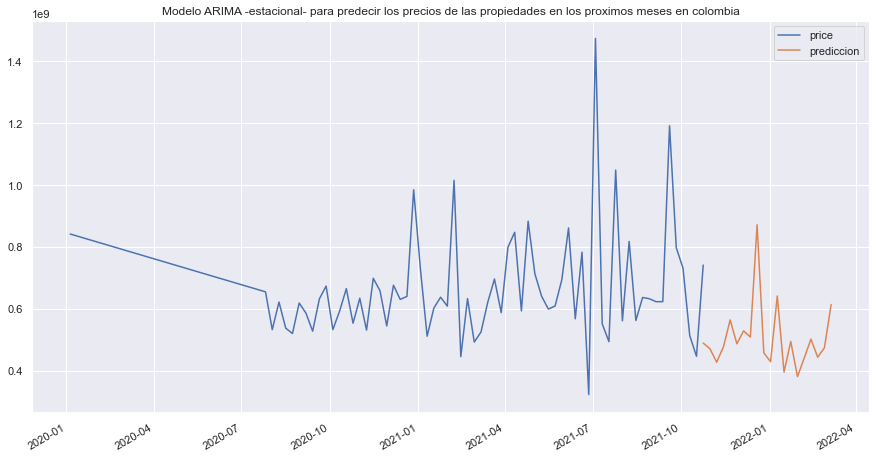

In [372]:
future_df['prediccion'] = results.predict(start=94,end=150, dynamic= True)  
future_df[['price', 'prediccion']].plot(figsize=(15, 8)) 
plt.title('Modelo ARIMA -estacional- para predecir los precios de las propiedades en los proximos meses en colombia')
plt.show()